In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, SpectralClustering, DBSCAN

s1 = pd.read_csv('data/processed/s1.csv')
s2 = pd.read_csv('data/processed/s2.csv')

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)

x, y = np.meshgrid(np.arange(1, 12), np.arange(1, 12))

labels_to_colors = {
   -1 : 'k',
    0 : 'tab:blue', # 'tab:olive',
    1 : 'tab:green',
    2 : 'tab:orange',
    3 : 'tab:brown',
}

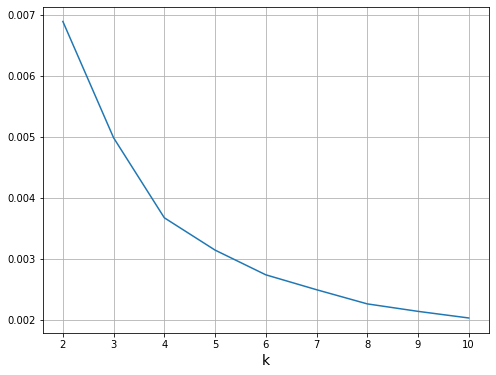

In [3]:
# already normalized, no more scaling required (?)
X = s2.values

distortions = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, max_iter=10000, tol=1e-6, random_state=0).fit(X)
    distortions.append(kmeans.inertia_)
    
plt.plot(np.arange(2, 11), distortions)
plt.xlabel('k', fontsize=14)
plt.grid()

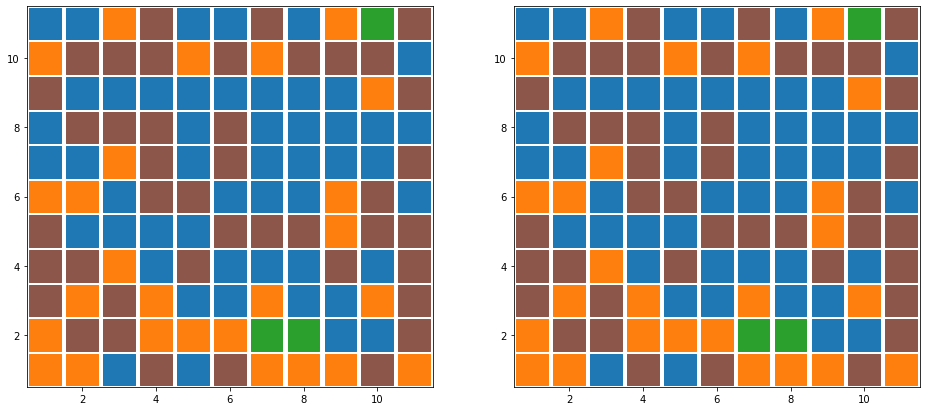

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

X = s2.values

kmeans = KMeans(n_clusters=4, max_iter=10000, tol=1e-6, random_state=0).fit(X)
labels = kmeans.predict(X)

colors = np.array([labels_to_colors[i] for i in labels])

ax1.scatter(x, y, c=colors, s=1000, marker='s')

X = X[:, :np.where(s1.columns == '1600')[0][0]]

kmeans = KMeans(n_clusters=4, max_iter=10000, tol=1e-6, random_state=0).fit(X)
labels = kmeans.predict(X)

colors = np.array([labels_to_colors[i] for i in labels])
# oranges = np.where(colors == 'tab:orange')
# greens = np.where(colors == 'tab:green')

# colors[oranges] = 'tab:green'
# colors[greens] = 'tab:orange'

ax2.scatter(x, y, c=colors, s=1000, marker='s')